# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [114]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_entreno, y_entreno), (X_prueba, y_prueba) = fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

In [115]:
import matplotlib.pyplot as plt

In [116]:
imagen = X_entreno[1]

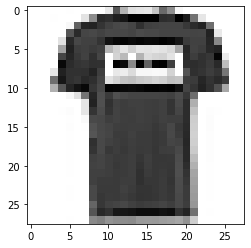

In [117]:
plt.imshow(imagen, cmap="Greys")

## Preprocesamiento de los Datos

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**

In [118]:
from tensorflow.keras.utils import to_categorical

1.0


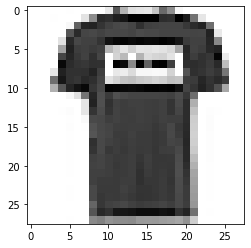

In [119]:
X_train = X_entreno / 255
X_test = X_prueba / 255
una_normalizada = X_train[1]
print(una_normalizada.max())
plt.imshow(una_normalizada, cmap="Greys")

**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**

In [120]:
print("X_train antes", X_train.shape)
X_train = X_train.reshape(60000, 28, 28, 1)
print("X_train despues", X_train.shape)


X_train antes (60000, 28, 28)
X_train despues (60000, 28, 28, 1)


In [121]:
print("X_test antes", X_test.shape)
X_test = X_test.reshape(10000, 28, 28, 1)
print("X_test despues", X_test.shape)


X_test antes (10000, 28, 28)
X_test despues (10000, 28, 28, 1)


**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**

In [122]:
y_cat_test = to_categorical(y_prueba, 10)
y_cat_train = to_categorical(y_entreno, 10)

## Configuración del Modelo

**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

In [123]:
from warnings import filters


model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4)), tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.Flatten(input_shape = (28,28)),tf.keras.layers.Dense(units = 128, activation = 'relu'),tf.keras.layers.Dense(units = 10, activation = 'softmax')])

In [124]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### Entrenamiento del Modelo
**TAREA 7: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [125]:
model.fit(X_train,y_cat_train, epochs=10,validation_data = (X_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3985 - accuracy: 0.8562 - val_loss: 0.3393 - val_accuracy: 0.8728
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2716 - accuracy: 0.9026 - val_loss: 0.2899 - val_accuracy: 0.8945
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2255 - accuracy: 0.9181 - val_loss: 0.2924 - val_accuracy: 0.8997
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1927 - accuracy: 0.9300 - val_loss: 0.3075 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1676 - accuracy: 0.9388 - val_loss: 0.3186 - val_accuracy: 0.8958
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1458 - accuracy: 0.9475 - val_loss: 0.3248 - val_accuracy: 0.9028
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1281 - accuracy: 0.9543 - val_loss: 0.3415 - val_ac

### Evaluación del Modelo

**TAREA 8: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [130]:
from sklearn.metrics import classification_report
import numpy as np

test_loss, test_acc = model.evaluate(X_test,y_cat_test, verbose=2)

print('\nTest accuracy:', test_acc)

predicciones = model.predict(X_test)
predicciones=np.argmax(predicciones, axis=1)




313/313 - 1s - loss: 0.4704 - accuracy: 0.8983 - 528ms/epoch - 2ms/step

Test accuracy: 0.8982999920845032
313/313 [==============================] - 1s 2ms/step


In [131]:
predicciones[0]


9

In [132]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.75      0.91      0.82      1000
           3       0.92      0.89      0.91      1000
           4       0.84      0.79      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.80      0.67      0.73      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Gran trabajo!